In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
#from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
df = pd.read_csv(r'G:\data science tutorials\comptask\data.csv')

In [7]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
target_col = "Target"

In [9]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [10]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [11]:
#stats models

X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [12]:
results = model.fit()
results.params

const        2.708949
Feature 1    0.044059
Feature 2    0.199287
Feature 3    0.006882
dtype: float64

In [13]:
results = model.fit()
results.params

const        2.708949
Feature 1    0.044059
Feature 2    0.199287
Feature 3    0.006882
dtype: float64

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.88e-69
Time:                        13:12:11   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

In [15]:
X_test = sm.add_constant(X_test)

In [16]:
y_pred = results.predict(X_test)

In [17]:

residual = y_test - y_pred

In [18]:
X_train.values

array([[284.3,  10.6,   6.4],
       [184.9,  21. ,  22. ],
       [112.9,  17.4,  38.6],
       [ 23.8,  35.1,  65.9],
       [290.7,   4.1,   8.5],
       [ 19.4,  16. ,  22.3],
       [293.6,  27.7,   1.8],
       [ 18.7,  12.1,  23.4],
       [134.3,   4.9,   9.3],
       [ 25.6,  39. ,   9.3],
       [100.4,   9.6,   3.6],
       [ 80.2,   0. ,   9.2],
       [188.4,  18.1,  25.6],
       [177. ,  33.4,  38.7],
       [125.7,  36.9,  79.2],
       [209.6,  20.6,  10.7],
       [142.9,  29.3,  12.6],
       [184.9,  43.9,   1.7],
       [222.4,   4.3,  49.8],
       [241.7,  38. ,  23.2],
       [ 17.2,  45.9,  69.3],
       [120.5,  28.5,  14.2],
       [ 89.7,   9.9,  35.7],
       [191.1,  28.7,  18.2],
       [ 75.5,  10.8,   6. ],
       [193.2,  18.4,  65.7],
       [ 85.7,  35.8,  49.3],
       [266.9,  43.8,   5. ],
       [ 39.5,  41.1,   5.8],
       [261.3,  42.7,  54.7],
       [ 13.2,  15.9,  49.6],
       [193.7,  35.4,  75.6],
       [296.4,  36.3, 100.9],
       [26

In [20]:
X_train.shape

(140, 3)

In [21]:
X_train.shape[1]

3

In [22]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Feature 1,Feature 2,Feature 3
vif,2.697679,3.473818,3.162643


In [23]:
vif

[2.6976786689636105, 3.473818052574502, 3.1626430160143677]

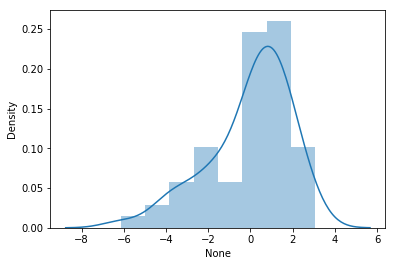

In [24]:
sns.distplot(residual)

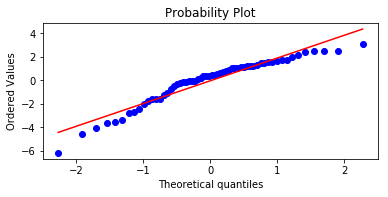

In [25]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [26]:
np.mean(residual)

-0.03848895253439809

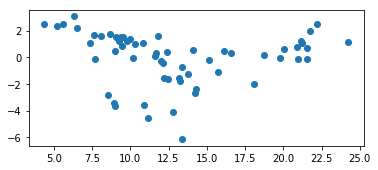

In [27]:
#Homoscedasticity¶

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

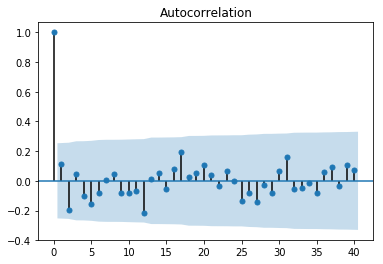

In [28]:
#autocorrelation
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()